Regresión lineal simple (SLR)

In [3]:
# Regresion lineal: Se refiere al uso de una sola variable para hacer la predicción

# Predictor : Variable independiente X
# Objetivo : Variable dependiente Y

# Formula : Y = mX + b donde m es la pendiente y b el intercepto con el eje

In [4]:
import pandas as pd
import numpy as np

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(url, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
from sklearn.linear_model import LinearRegression

# Se crea un objeto para la regresion lineal
linear_model = LinearRegression()

# Se definen las variables predictora y objetivo
x = df[['highway-mpg']] # Predictor
y = df[['price']] # Objetivo

# Se utiliza el metodo fit(x,y) para ajustar el modelo y obtener m y b
linear_model.fit(x,y)

# Se obtiene la predicción con el metodo predict y de argumento la variable predictora
Yhat = linear_model.predict(x)
Yhat[0:5] # Imprime los valores de la predicción 

# Para obtener el intercepto b con la funcion intercept_
intercepto = linear_model.intercept_
print(f'El intercepto es {intercepto}')

# Para obtener la pendiente m con la funcion coef_
slope = linear_model.coef_
print(f'La pendiente es {slope}')

# La ecuacion lineal para la prediccion 
Price = slope*df[['highway-mpg']] + intercepto
Price

El intercepto es [38423.30585816]
La pendiente es [[-821.73337832]]


,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


Regresión lineal multiple (MLR)

In [6]:
# Regresion multiple: Se refiere al uso de multiples variables independientes para ahcer predicción
# Se utiliza para explicar la relacion entre una variable continua y 2 o mas variables predictoras

# Predictor : Variables predictoras X
# Objetivo : Variable continua Y

# Formula : Y = B + B1X1 + ... + BnXn donde b es el intercepto y Bn el coeficiente o parametro de Xn

In [7]:
# Se almacenan los predictores en una variable

z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

# Se crea un objeto para la funcion de regresión
multiple_model = LinearRegression()

# Se entrena el modelo con el metodo fit() que recibe los predictores y la variable objetivo
multiple_model.fit(z,df['price'])

# Se obtiene la prediccion con el metodo precit()

Yhat=multiple_model.predict(z)

# Se obtiene el intercepto b
intercepto_multiple = multiple_model.intercept_
print(f'El intercepto cuando X=0 es: {intercepto_multiple}')

# Se obtiene el array de coeficientes para cada X
coeficientes_multiple = multiple_model.coef_
print(f'Los coeficientes para cada varaible predictora son: {coeficientes_multiple}')

# La ecuacion de la funcion
Price2 = intercepto_multiple + df[['horsepower']]*coeficientes_multiple[0] + df[['curb-weight']]*coeficientes_multiple[1] + df[['engine-size']]*coeficientes_multiple[2] + df[['highway-mpg']]*coeficientes_multiple[3]


El intercepto cuando X=0 es: -15806.62462632923
Los coeficientes para cada varaible predictora son: [53.49574423  4.70770099 81.53026382 36.05748882]


Evaluación del modelo usando visualización

Graficos de regresión

Brindan informacion visual acerca de la relacion entre dos variables, la fuerza de la correlacion y la direccion de la relacion

(0.0, 48169.63591931876)

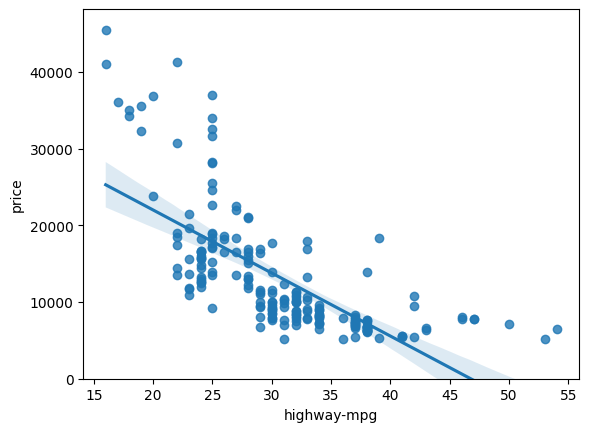

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafico de dispersion con x como el predictor, y como el objetivo y data como el DataFrame
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

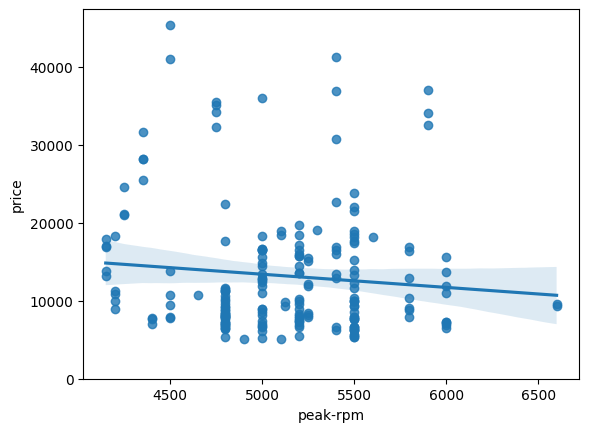

In [9]:
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [10]:
# Determinar que valores estan mayormente correlacionados

df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Calculo del error y grafico de residuos

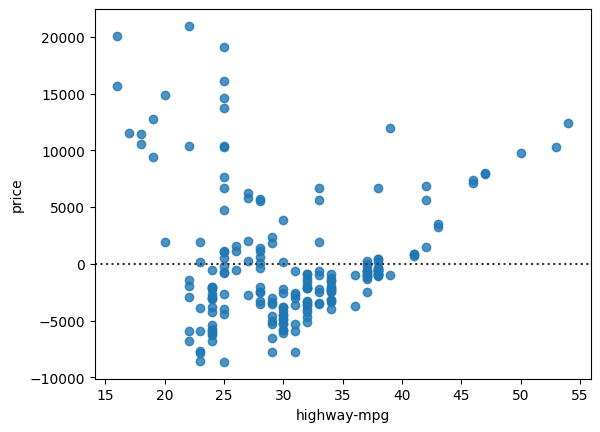

In [11]:
# Residuo o error : Es la diferencia entre el valor observado y el valor predicho, en un grafico es la distancia desde el punto del dato hasta la linea de regresion ajustada
# Luego estos valores se grafican para determinar que regresion es la mas adecuada
# Los residuos se grafican en el eje y y la variable independiente en el eje x
# Formula : Y = b + BnXn + E 

# Graficar el diagrama de residuos
# Si los puntos en un draigra de residuos estas aleatoreamente esparcidos alrededore del eje x entonces un modelo lineal es apropiedo para los datos
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()


Graficos de distribución

C:\Users\angel\AppData\Local\Temp\ipykernel_12532\4044218713.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual value')
C:\Users\angel\AppData\Local\Temp\ipykernel_12532\4044218713.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

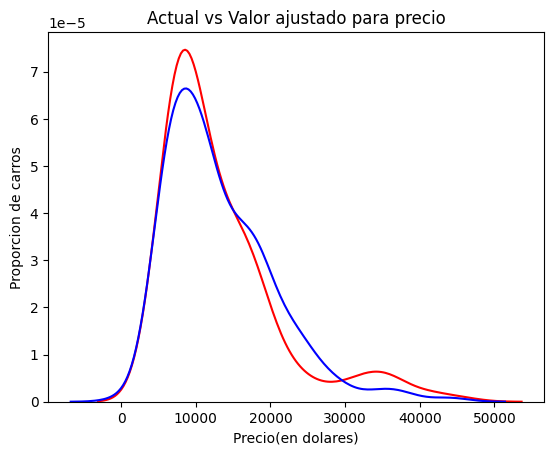

In [12]:
#Permiten determinar los valores que se ajustan al modelo 
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

# Se crea un objeto para la funcion de regresión
multiple_model = LinearRegression()

# Se entrena el modelo con el metodo fit() que recibe los predictores y la variable objetivo
multiple_model.fit(z,df['price'])

# Se obtiene la prediccion con el metodo precit()
Yhat=multiple_model.predict(z)

# Graficar diagrama
ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual value')
sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

plt.title('Actual vs Valor ajustado para precio')
plt.xlabel('Precio(en dolares)')
plt.ylabel('Proporcion de carros')

plt.show()
plt.close()

Regresion polinomica y Pipelines

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


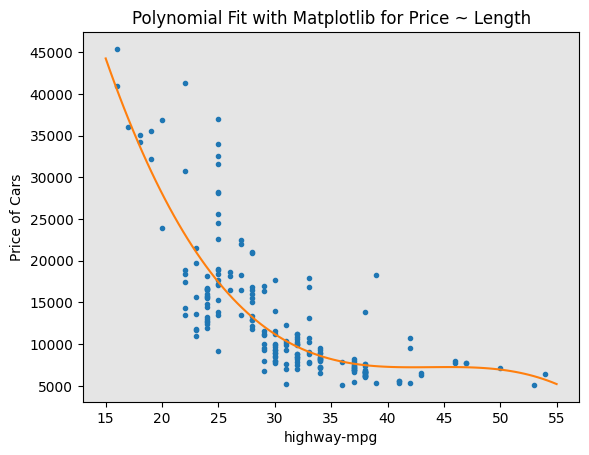

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [13]:
# Es un caso especial de la regresion lineal, se utiliza para describir la relacion curvilinea de la variable predictora

# Cuadratica : Y = b + b1x1 + b2(x1)^2
# Cubica : Y = b + b1x1 + b2(x1)^2 + b3(x1)^3
# Orden mayor : Y = b + b1x1 + b2(x1)^2 + ... + bn(x1)^n

# Calcular polinomio de 3er orden
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = df['highway-mpg']
y = df['price'] 

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

PlotPolly(p,x,y,'highway-mpg')

np.polyfit(x,y,3)

In [ ]:
# Regresion polinomica con mas de una dimension
# Formula : Y = b + b1x1 + b2x2 + b2(x1)^2 + b3(x1)^3

#Libreria de preprocesado

from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
z_pr = pr.fit_transform(z)
pd.DataFrame(z_pr)

Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Se crea el pipeline creando una lista de tuplas incluyendo el nombre del modelo y su constructor
# Pipeline para regresion multiple
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)

# Se cambia el tipo de datos de z y se ajusta el modelo
z = z.astype(float)
pipe.fit(z,y)

# Se normalizan los datos, se transforman y se produce una prediccion simultaneamente
ypipe = pipe.predict(z)
pd.DataFrame(ypipe)

,0
0,13102.747842
1,13102.747842
2,18225.545722
3,10390.296366
4,16136.296192
...,...
196,14749.229289
197,18027.490721
198,19827.656418
199,17324.329825


In [ ]:
# Pipeline para regresion simple

Input = [('scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(z,y)
ypipe = pipe.predict(z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

Medidas para evaluacion dentro de la muestra

MSE para modelo Regresion lineal simple

In [ ]:
# MSE Error promedio cuadrado : Mide el promedio del cuadrado de los errores
# R^2 o coeficiente de determinación : Indica cuan cerca esta un dato de la linea de regresion ajustada y cuanta participacion tienen las variables seleccionadas en la prediccion de los valores de la variable

# Modelo de Regresion lineal simple

# Calculo de R^2
lm1 = LinearRegression()
X = df[['highway-mpg']]
Y = df[['price']]
lm1.fit(X,Y)
print(f'El R^2 is: {lm1.score(X,Y)}')

# Calculo del MSE
Yhat = lm1.predict(X)
print(f'El resultado de los primeros cuatro valores predecidos son: {Yhat[0:4]}')

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'],Yhat)
print(f'El MSE de precio y el valor predecido es: {mse}')

El R^2 is: 0.4965911884339176
El resultado de los primeros cuatro valores predecidos son: [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]
El MSE de precio y el valor predecido es: 31635042.944639888


MSE para modelo de Regresion Multiple

In [ ]:
z_MSE = df[['horsepower','curb-weight','engine-size','highway-mpg']]

# Se crea un objeto para la funcion de regresión
multiple_model_MSE = LinearRegression()

# Se entrena el modelo con el metodo fit() que recibe los predictores y la variable objetivo
multiple_model_MSE.fit(z_MSE,df['price'])
print(f'El R^2 es: {multiple_model_MSE.score(z_MSE,df["price"])}')

Y_predict_miltifit = multiple_model_MSE.predict(z_MSE)
print(f'El MSE de precio y el valor predecido es: {mean_squared_error(df["price"], Y_predict_miltifit)} ')

El R^2 es: 0.8093562806577457
El MSE de precio y el valor predecido is: 11980366.87072649 


MSE para Ajuste Polinomico

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y,p(x))
print(f'El valor de R^2 es: {r_squared}')
print(f'El MSE es: {mean_squared_error(df["price"],p(x))}')

El valor de R^2 es: 0.6741946663906517
El MSE es: 20474146.42636122


Prediccion y toma de decisiones

C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


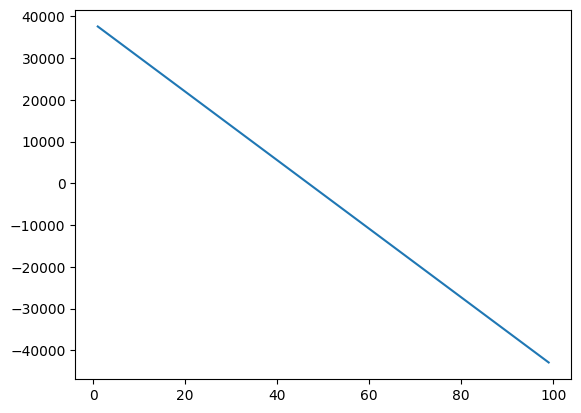

In [ ]:
# Se genera un nuevo modelo con el modelo previamente entrenado para realizar las predicciones

new_input = np.arange(1,100,1).reshape(-1,1)
linear_model.fit(X,Y)
yhat = linear_model.predict(new_input)
yhat[0:5]

# Grafica

plt.plot(new_input,yhat)
plt.show()

### Para decidir entre los diferentes modelos de regresión se deben comparar los diferentes valores obtenidos para R^2 y MSE, de tal manera que el R^2 sea el mayor y el MSE lo mas pequeño posible.

En el caso de ejemplo se tiene que:

Regresion lineal simple: Usando 'Highway-mpg' como una Variable Predictor de Precio. 

    {'R-squared' : 0.49659118843391759,
    'MSE' : 3.16 x10^7}.

Regresion lineal multiple: Usando 'Horsepower', 'Curb-weight', 'Engine-size' y 'Highway-mpg' Variable Predictoras de Precio.

    {'R-squared' : 0.80896354913783497,
    'MSE' : 1.2 x10^7}

Ajuste Polinomico: Usando 'Highway-mpg' como una Variable Predictor de Precio.

    {'R-squared': 0.6741946663906514,
    'MSE' : 2.05 x 10^7}

Por ende, el modelo que mejor se ajusta para las predicciones es el modelo de Regresion Lineal Multiple (MLR). A ello se le suma que solo se tomaron 4 variables del conjunto total que se tenia para hacer la predicción.